<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        BIODIVERSITY  OBSERVATIONS ANALYSIS
    </h1>
    </div>

<h2 align="center"><font color=#2067d4> Exploratory Data Analysis (EDA) Project</font></h2> 

---
    
<p align="center"><font color=#2067d4>
  Amarja Kumbhar and Sameehan Sahasrabudhe
   </font>
</p>
 <a href="https://github.com/AmarjaKumbhar1505/Advance_Python_Programming">GitHub</a> 


<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=dodgerblue> 🎯 Project Description:</font></h3>   

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Biodiversity Observations
- we will visualize Data using Seaborn and Matplotlib. 
- Analysis of biodiversity data from 100,000 observations across multiple species and regions..
    
<h3 align="left"><font color=dodgerblue> 📝 About the Datasets </font></h3>     
    
**Dataset Descriptions:** 'dataset_5.csv'. 

- **Content:** The dataset contains 50 columns, each representing different aspects of species observations.
- **Rows:** 10000    
- **Columns:** 50
    - **Few Examples of features(Columns)** 
    - **Kingdom:** Kingdoms in which a pertiular species belongs. Example: Animalia, Plantae, etc.
    - **Phylum**: Phylum is a level of classification or taxonomic rank below kingdom and above class. Groups into which animals, plants, etc. are divided.
    - **Class**: Class is a group of related taxonomic orders. Organisms in a class share more characteristics with each other than they do with other organisms in the same phylum.
    - **Order**: Order is a hierarchical rank used to classify organisms. It is classified between family and class.
    - **Family**: A taxonomic group of one or more genera,especially sharing a common attribute.
    - **Genus**: A taxonomic group that includes multiple species that are related by common characteristics or phylogenetic relatedness.
    - **Species**: A group of organisms that can reproduce with each other and produce fertile offspring.
    - **Scientific Name**: A unique name for an organism that is used by scientists and is the same across all languages.
    - **Taxon Rank**: The level of a group of organisms in a hierarchical system based on their ancestry or heredity.
    - **country code**: Alphanumeric code used to identify countries
    - **State province**: State is a regional government in a federal system, while a province is a regional government in a unitary state.
    - **Decimal latitude**: The distance of a place north or south of the line that we imagine around the middle of the earth (the equator)
    - **Decimal longitude**: The distance of a place east or west of a line from the North Pole to the South Pole that passes through Greenwich in London. 
    - **Co-ordinate Uncertainty in meter**: The uncertainty in the measurement of a coordinate in meters.
    - **Event date**: Event Date
    - **Taxon key**: A tool used to identify and classify organisms, such as plants and animals. It's also known as a dichotomous key.
    - **Species key**: A tool that helps identify an unknown organism by comparing contrasting characteristics.
    - **Basis of observation**: Information about how the observation has been recorded.

- **What does the data contain** : 
    
    The dataset contains information on biodiversity observations, with 50 columns that represent various features of species observations.

    *The key types of variables include*:
    Identification and Taxonomy: Fields like gbifID, datasetKey, kingdom, phylum, class, order, genus, species provide taxonomic information of the observed species.
    Location: decimalLatitude, decimalLongitude, countryCode describe the geographic locations where species were observed.
    Temporal Information: eventDate, year, month, day record the time when the observations were made.
    Metadata: Fields like identifiedBy, license, recordedBy provide metadata on the observation process.

    *Variable Types*:
    Categorical: Fields like countryCode, species, license.
    Numerical: decimalLatitude, decimalLongitude, year, coordinateUncertaintyInMeters.
    Missing/Partially Filled: Variables like elevation, depth, and individualCount often contain missing values. 

    The data reflects both a concentrated effort in recent years to observe and document biodiversity, as well as gaps in observation data that may suggest under-reporting or difficulty in accessing certain regions.

---


## <font color=#2865c8> <b> UNDERSTANDING THE DATA </b><font color='orange'>

### <font color='dodgerblue'> <b> Import The Libraries</b><font color='orange'>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

  
# Enable inline plotting
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Import the “dataset_5.csv" file using Pandas

file_path = 'dataset_5.csv'
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_5.csv'

### <font color='dodgerblue'> <b> Performing Essential Statistical Analysis on the Dataset </b><font color='orange'>

#### <font color='orange'> <b> 1. Basic information about the dataset </b><font color='orange'>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gbifID                            100000 non-null  int64  
 1   datasetKey                        100000 non-null  object 
 2   occurrenceID                      99998 non-null   object 
 3   kingdom                           100000 non-null  object 
 4   phylum                            99979 non-null   object 
 5   class                             98684 non-null   object 
 6   order                             96822 non-null   object 
 7   family                            99936 non-null   object 
 8   genus                             99909 non-null   object 
 9   species                           98735 non-null   object 
 10  infraspecificEpithet              3269 non-null    object 
 11  taxonRank                         100000 non-null  ob

#### Data description reflects a dataset of 100,000 entries and 50 columns, which appears to be related to biological occurrences (potentially from a biodiversity database like GBIF).
Several columns contain significant amounts of missing data, including :
verbatimScientificNameAuthorship (entirely missing),
locality (entirely missing),
individualCount (entirely missing),
infraspecificEpithet (96.7% missing).

Key Identifiers:

gbifID: A unique identifier for each entry, present in all rows (100,000 non-null).
datasetKey and occurrenceID: Identifiers for datasets and occurrences, with occurrenceID having two missing values.
Taxonomic Classification: Columns such as kingdom, phylum, class, order, family, genus, and species contain taxonomic data.

kingdom is complete with all 100,000 values, but there is some missing data in other taxonomic levels:
phylum has 21 missing values.
class has 1,316 missing values.
order has 3,178 missing values.
family has 64 missing values.
genus has 91 missing values.
species has 1,265 missing values.
infraspecificEpithet (subspecies) has very sparse data with only 3,269 non-null values.

Also, We observe information about Scientific names, Geographical Information, Occurance Information, Media and Metadata.
Overall, this dataset contains a wealth of taxonomic, geographical, and occurrence data, but certain columns have substantial missing values, particularly related to specific geographic details and media.

 #### <font color='orange'> <b> 2. First 5 rows of the dataset </b><font color='orange'>

In [4]:
data.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,3005127375,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42269260,Plantae,Tracheophyta,Liliopsida,Asparagales,Asparagaceae,Maianthemum,Maianthemum canadense,NaN,SPECIES,Maianthemum canadense Desf.,Maianthemum canadense,NaN,US,NaN,New York,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,40.749279,-73.150795,75.0,NaN,NaN,NaN,NaN,NaN,2020-04-15T13:13:04,15,4,2020,2769544,2769544.0,HUMAN_OBSERVATION,iNaturalist,Observations,42269260,NaN,Sequoia Janirella Wrens,2020-04-15T21:54:35,CC0_1_0,Sequoia Janirella Wrens,Sequoia Janirella Wrens,NaN,NaN,2023-09-21T13:49:00.714Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,2609120458,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42487259,Plantae,Tracheophyta,Magnoliopsida,Geraniales,Geraniaceae,Geranium,Geranium sanguineum,NaN,SPECIES,Geranium sanguineum L.,Geranium sanguineum,NaN,RU,NaN,Belgorod,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,51.199074,37.639732,174.0,NaN,NaN,NaN,NaN,NaN,2010-06-18T11:32:00,18,6,2010,2890920,2890920.0,HUMAN_OBSERVATION,iNaturalist,Observations,42487259,NaN,svg52,2020-04-18T17:23:45,CC_BY_NC_4_0,Degtyarev Nikolai Ivanovich,Degtyarev Nikolai Ivanovich,NaN,NaN,2023-09-21T13:49:07.678Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,2609280234,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42723454,Plantae,Tracheophyta,Magnoliopsida,Geraniales,Geraniaceae,Geranium,Geranium robertianum,NaN,SPECIES,Geranium robertianum L.,Geranium robertianum,NaN,US,NaN,Washington,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,45.681986,-122.538162,27126.0,NaN,NaN,NaN,NaN,NaN,2020-04-20T18:32:01,20,4,2020,2890668,2890668.0,HUMAN_OBSERVATION,iNaturalist,Observations,42723454,NaN,colby_ree,2020-04-21T01:32:52,CC_BY_NC_4_0,colby_ree,colby_ree,NaN,NaN,2023-09-21T13:49:15.426Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,2626475497,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/42979497,Animalia,Chordata,Squamata,NaN,Dactyloidae,Anolis,Anolis sagrei,NaN,SPECIES,"Anolis sagrei Duméril & Bibron, 1837",Anolis sagrei,NaN,US,NaN,Florida,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,27.766636,-82.640770,5.0,NaN,NaN,NaN,NaN,NaN,2020-04-23T14:54:34,23,4,2020,4287413,4287413.0,HUMAN_OBSERVATION,iNaturalist,Observations,42979497,NaN,Chris Thawley,2020-05-06T12:40:49,CC_BY_NC_4_0,roxanne_h,roxanne_h,NaN,NaN,2023-09-21T13:49:23.251Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,3468939364,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/43243876,Plantae,Bryophyta,Bryopsida,Orthotrichales,Orthotrichaceae,Ulota,Ulota hutchinsiae,NaN,SPECIES,Ulota hutchinsiae (Sm.) Hammar,Ulota hutchinsiae,NaN,US,NaN,Connecticut,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,41.438518,-72.062306,30.0,NaN,NaN,NaN,NaN,NaN,2020-04-23T15:03:00,23,4,2020,2671915,2671915.0,HUMAN_OBSERVATION,iNaturalist,Observations,43243876,NaN,MikeN,2020-04-25T02:52:10,CC_BY_NC_4_0,MikeN,MikeN,NaN,NaN,2023-09-21T13:49:30.641Z,StillImage;StillImage;StillImage;StillImage;St...,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


 #### <font color='orange'> <b> 3. Last 5 rows of the dataset </b><font color='orange'>

In [5]:
data.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
99995,3747313788,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10907...,Animalia,Chordata,Aves,Anseriformes,Anatidae,Branta,Branta canadensis,NaN,SPECIES,"Branta canadensis (Linnaeus, 1758)",Branta canadensis,NaN,US,NaN,South Carolina,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,34.927711,-82.370941,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20T11:25:00,20,3,2022,5232437,5232437.0,HUMAN_OBSERVATION,iNaturalist,Observations,109078311,NaN,Norm Shea,2022-03-20T20:21:48,CC_BY_NC_4_0,cynthianwalsh,cynthianwalsh,NaN,NaN,2023-09-21T16:09:54.979Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99996,3747207218,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10928...,Plantae,Tracheophyta,Magnoliopsida,Lamiales,Plantaginaceae,Veronica,Veronica persica,NaN,SPECIES,Veronica persica Poir.,Veronica persica,NaN,FR,NaN,Rhône-Alpes,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,45.550235,4.715403,14.0,NaN,NaN,NaN,NaN,NaN,2022-03-23T14:34:27,23,3,2022,3172077,3172077.0,HUMAN_OBSERVATION,iNaturalist,Observations,109283377,NaN,sarahpripri,2022-03-23T13:40:41,CC_BY_NC_4_0,sarahpripri,sarahpripri,NaN,NaN,2023-09-21T16:10:02.129Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99997,3858178969,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10951...,Plantae,Tracheophyta,Magnoliopsida,Gentianales,Apocynaceae,Funastrum,Funastrum cynanchoides,NaN,SPECIES,Funastrum cynanchoides (Decne.) Schltr.,Funastrum cynanchoides,NaN,US,NaN,Texas,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,28.057723,-97.876230,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-23T12:04:00,23,3,2022,3170225,3170225.0,HUMAN_OBSERVATION,iNaturalist,Observations,109513849,NaN,Michelle,2022-03-26T03:32:25,CC_BY_4_0,Michelle,Michelle,NaN,NaN,2023-09-21T16:10:09.991Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
99998,3759210218,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10974...,Animalia,Chordata,Aves,Cuculiformes,Cuculidae,Cacomantis,Cacomantis merulinus,NaN,SPECIES,"Cacomantis merulinus (Scopoli, 1786)",Cacomantis merulinus,NaN,TH,NaN,Pathum Thani,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,13.975490,100.777442,19746.0,NaN,NaN,NaN,NaN,NaN,2019-03-02T18:09:00,2,3,2019,2496253,2496253.0,HUMAN_OBSERVATION,iNaturalist,Observations,109745725,NaN,Sam Hambly,2022-03-28T11:46:55,CC_BY_NC_4_0,Sam Hambly,Sam Hambly,NaN,NaN,2023-09-21T16:10:17.784Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
99999,3759664498,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/10998...,Plantae,Marchantiophyta,Jungermanniopsida,Porellales,Porellaceae,Porella,Porella navicularis,NaN,SPECIES,Porella navicularis (Lehm. & Lindenb.) Pfeiff.,Porella navicularis,NaN,CA,NaN,British Columbia,PRESENT,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d,48.781114,-123.948869,35.0,NaN,NaN,NaN,NaN,NaN,2022-03-30T17:53:00,30,3,2022,8035419,8035419.0,HUMAN_OBSERVATION,iNaturalist,Observations,109986313,NaN,Steven Hayward,2022-03-31T05:38:12,CC_BY_NC_4_0,Steven Hayward,Steven Hayward,NaN,NaN,2023-09-21T16:10:24.639Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


### **What does the data contain**
The dataset contains information on biodiversity observations, with 50 columns that represent various features of species observations. 

#### **The key types of variables include:**

**Identification and Taxonomy:** Fields like gbifID, datasetKey, kingdom, phylum, class, order, genus, species provide taxonomic information of the observed species.

**Location:** decimalLatitude, decimalLongitude, countryCode describe the geographic locations where species were observed.

**Temporal Information:** eventDate, year, month, day record the time when the observations were made.

**Metadata:** Fields like identifiedBy, license, recordedBy provide metadata on the observation process.


#### **Variable Types:**

**Categorical:** Fields like countryCode, species, license.

**Numerical:** decimalLatitude, decimalLongitude, year, coordinateUncertaintyInMeters.

**Missing/Partially Filled:** Variables like elevation, depth, and individualCount often contain missing values.

 #### <font color='orange'> <b> 4. Statistical Description of the dataset </b><font color='orange'>

In [6]:
# Basic statistics summary of Numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gbifID,100000.0,3.313398e+09,7.872276e+08,8.910187e+08,2.826249e+09,3.415386e+09,3.986271e+09,4.414443e+09
verbatimScientificNameAuthorship,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
individualCount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decimalLatitude,99764.0,3.123703e+01,2.511721e+01,-7.721700e+01,2.960094e+01,3.891282e+01,4.555395e+01,7.961915e+01
decimalLongitude,99764.0,-3.748069e+01,8.102680e+01,-1.798810e+02,-9.694332e+01,-7.623899e+01,1.424110e+01,1.794023e+02
coordinateUncertaintyInMeters,80678.0,5.771163e+03,8.957490e+04,1.000000e+00,8.000000e+00,3.100000e+01,2.640000e+02,1.365013e+07
coordinatePrecision,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevationAccuracy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Description : The dataset contains 100,000 records with key fields such as gbifID (unique identifier), decimalLatitude, decimalLongitude, and taxonKey mostly populated. Geographic data shows global coverage, while temporal data (day, month, year) is complete, mostly from recent decades. Taxonomic classification is well represented, though some fields like verbatimScientificNameAuthorship, locality, and individualCount are entirely missing. The precision of location data varies significantly, and there are gaps in specific columns like coordinatePrecision and elevation. Overall, the dataset is rich in species and occurrence information but lacks in some metadata.

 #### <font color='orange'> <b> 5. Checking Duplicate Values in the dataset </b><font color='orange'>


In [8]:
# Check out the duplicated values!!!!!!!!
data.duplicated().sum()
#Dropping Duplicate records
duplicated_rows = data[data.duplicated(keep=False)]
duplicated_rows

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue


 #### <font color='orange'> <b> 6. Checking Missing Values in the dataset </b><font color='orange'>


In [9]:
data.isnull().sum()

gbifID                                   0
datasetKey                               0
occurrenceID                             2
kingdom                                  0
phylum                                  21
class                                 1316
order                                 3178
family                                  64
genus                                   91
species                               1265
infraspecificEpithet                 96731
taxonRank                                0
scientificName                           0
verbatimScientificName                   0
verbatimScientificNameAuthorship    100000
countryCode                            317
locality                            100000
stateProvince                          501
occurrenceStatus                         0
individualCount                     100000
publishingOrgKey                         0
decimalLatitude                        236
decimalLongitude                       236
coordinateU

#### **The dataset contains missing values across several columns:**

Key identifiers like gbifID, datasetKey, kingdom, and scientificName are fully populated (0 missing values).

**Taxonomy:** Some taxonomic fields have missing values, including phylum (21 missing), class (1,316 missing), order (3,178 missing), and species (1,265 missing). Notably, infraspecificEpithet has 96,731 missing values (97%).

**Geographical Data:** decimalLatitude and decimalLongitude have 236 missing values, while coordinateUncertaintyInMeters is missing in 19,322 entries.

**Metadata:** Fields like verbatimScientificNameAuthorship, locality, coordinatePrecision, individualCount, and establishmentMeans are entirely missing.

**Other Fields:** Columns such as countryCode (317 missing), stateProvince (501 missing), and mediaType (3,743 missing) also have some missing data.

Overall, the dataset is mostly complete for key attributes but has substantial missing values in fields related to geographical precision, subspecies classification, and specific metadata.

 #### <font color='orange'> <b> 7. Checking Missing Values Pencentage in the dataset </b><font color='orange'>

In [10]:
missing_count = data.isnull().sum()
value_count = data.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage":missing_percentage})
missing_df

,count,percentage
gbifID,0,0.00
datasetKey,0,0.00
occurrenceID,2,0.00
kingdom,0,0.00
phylum,21,0.02
class,1316,1.32
order,3178,3.18
family,64,0.06
genus,91,0.09
species,1265,1.26


**Result description :** Missing values percentage for each feature(column) are shown above.

 #### <font color='orange'> <b> 8. Finding Column with more than 80% missing value </b><font color='orange'>

In [11]:
columns_to_drop = missing_percentage[missing_percentage > 80].index
columns_to_drop

Index(['infraspecificEpithet', 'verbatimScientificNameAuthorship', 'locality',
       'individualCount', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'recordNumber',
       'typeStatus', 'establishmentMeans'],
      dtype='object')

If a column has more than 80% missing values, it's often a good candidate for removal. This is because the column likely won't provide meaningful insights or data for analysis.

 #### <font color='orange'> <b> 9. Drpping Column with more than 80% missing value and cleaned data frame is created </b><font color='orange'>


In [12]:
data_cleaned = data.drop(columns=columns_to_drop)

In [13]:
#New data after cleaning Missing data
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   gbifID                         100000 non-null  int64  
 1   datasetKey                     100000 non-null  object 
 2   occurrenceID                   99998 non-null   object 
 3   kingdom                        100000 non-null  object 
 4   phylum                         99979 non-null   object 
 5   class                          98684 non-null   object 
 6   order                          96822 non-null   object 
 7   family                         99936 non-null   object 
 8   genus                          99909 non-null   object 
 9   species                        98735 non-null   object 
 10  taxonRank                      100000 non-null  object 
 11  scientificName                 100000 non-null  object 
 12  verbatimScientificName         

#### <font color='orange'> <b> 10. Basic statistics summary of Numerical features of cleaned data </b><font color='orange'>


In [14]:
# Basic statistics summary of Numerical features
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
gbifID,100000.0,3.313398e+09,7.872276e+08,8.910187e+08,2.826249e+09,3.415386e+09,3.986271e+09,4.414443e+09
decimalLatitude,99764.0,3.123703e+01,2.511721e+01,-7.721700e+01,2.960094e+01,3.891282e+01,4.555395e+01,7.961915e+01
decimalLongitude,99764.0,-3.748069e+01,8.102680e+01,-1.798810e+02,-9.694332e+01,-7.623899e+01,1.424110e+01,1.794023e+02
coordinateUncertaintyInMeters,80678.0,5.771163e+03,8.957490e+04,1.000000e+00,8.000000e+00,3.100000e+01,2.640000e+02,1.365013e+07
day,100000.0,1.583929e+01,8.957205e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,3.100000e+01
month,100000.0,6.394550e+00,2.773798e+00,1.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
year,100000.0,2.020273e+03,3.032960e+00,1.943000e+03,2.019000e+03,2.021000e+03,2.022000e+03,2.023000e+03
taxonKey,100000.0,4.264738e+06,2.456680e+06,2.374000e+03,2.481342e+06,3.101325e+06,5.371723e+06,1.237041e+07
speciesKey,98735.0,4.164651e+06,2.399212e+06,1.003567e+06,2.480863e+06,3.046258e+06,5.341175e+06,1.237041e+07
catalogNumber,100000.0,9.085488e+07,5.251089e+07,2.003000e+03,4.575099e+07,9.078688e+07,1.358756e+08,1.840368e+08


#### **This provides key statistics for several numerical columns in the dataset:**

**gbifID :**  Fully populated, with a mean of 3.31 billion and a wide range of values, indicating unique identifiers for 100,000 records.

**decimalLatitude & decimalLongitude :**  Almost complete, representing global location data. The latitude ranges from -77.22° to 79.62°, and longitude from -179.88° to 179.40°, covering both hemispheres.

**coordinateUncertaintyInMeters :**  Has significant variability, with a mean uncertainty of 5,771 meters and values ranging from 1 meter to over 13.6 million meters, showing a wide range of location accuracy.



**Temporal Data :**

day: Complete, with values from 1 to 31, indicating the day of the month.
month: Complete, with a mean of 6.39, covering all months.
year: Mostly recent records, with a mean year of 2020 and data spanning from 1943 to 2023.

**Taxonomic Information :**

taxonKey & speciesKey: Represent taxonomic classifications with a wide range of species identifiers.

catalogNumber: Represents specimen catalog numbers with a large range, from 2,003 to 184 million.


This data shows comprehensive coverage of taxonomic and location information, but variability in coordinate precision.

#### <font color='orange'> <b> 11. Basic statistics summary of Object features of cleaned data </b><font color='orange'>

In [15]:
# Basic statistics summary of Object features
data_cleaned.describe(include= 'object').T

,count,unique,top,freq
datasetKey,100000,1,50c9509d-22c7-4a22-a47d-8c48425ef4a7,100000
occurrenceID,99998,99998,https://www.inaturalist.org/observations/10998...,1
kingdom,100000,7,Animalia,58249
phylum,99979,33,Tracheophyta,38347
class,98684,105,Magnoliopsida,30809
order,96822,481,Lepidoptera,11441
family,99936,2182,Asteraceae,4615
genus,99909,11997,Anas,613
species,98735,26539,Anas platyrhynchos,428
taxonRank,100000,6,SPECIES,95466



#### **This summary provides key statistics for categorical columns in the dataset :**

**datasetKey :** Only 1 unique value, meaning all 100,000 records are from the same dataset.
**OccurrenceID :**  Almost all records (99,998) have unique occurrence IDs, with the most frequent one appearing only once.

**Taxonomic Information :**

kingdom: 7 unique values, with Animalia being the most common (58,249 occurrences).

phylum: 33 unique values, dominated by Tracheophyta (38,347 occurrences).

class: 105 unique classes, led by Magnoliopsida (30,809).

order: 481 unique orders, with Lepidoptera (11,441) being the most frequent.

species: 26,539 unique species, with Anas platyrhynchos being the most common (428 occurrences).

taxonRank: Mostly SPECIES (95,466 records).


**Geographical Information :**

countryCode: 216 unique countries, with the US being the most frequent (45,461 records).
stateProvince: 1,849 unique provinces, with California (8,716) leading.

**Observation Details :**

occurrenceStatus, basisOfRecord, institutionCode, collectionCode: All records have the same value (e.g., PRESENT, HUMAN_OBSERVATION).
mediaType: 53 unique types, with StillImage being the most common (61,597).
issue: The most frequent issue is COORDINATE_ROUNDED and others, affecting 90,148 records.

**This dataset has a strong focus on species observations, primarily from the US, and contains various taxonomic levels and metadata.**

#

#
#
### **Anomalies or inconsistencies :**

**Missing Values:** Several fields have high levels of missing data. For instance, elevation, depth, and individualCount are mostly or completely missing, indicating these measurements were not captured in many observations.

**Outliers in Coordinates:**
Some extreme values in coordinateUncertaintyInMeters, ranging from 0 to over 13 million meters, which suggests variability in the precision of recorded locations. Some regions might have significantly less accurate geographic data. Missing or incorrect latitudes and longitudes in a small number of entries.

**Geographical Gaps:** Some geographical regions have dense observation clusters while others have sparse data. This could suggest incomplete geographic coverage.

<a id='data-visualisation'></a>
## <font color=#2865c8> <b> Data Visualisation </b><font color='orange'>


<a id='categorical-features'></a>
###  <font color=#2865c8> <b>Categorical Features</b><font color='orange'>

<a id='dist-categorical'></a>
###  <font color='orange'> <b> Distribution of Categorical Features</b><font color='orange'>

#### <font color='orange'> <b> 1. observe unique values </b><font color='orange'>

In [16]:
# Let's observe unique values 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [17]:
get_unique_values(data_cleaned)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,gbifID,100000,-,int64
1,datasetKey,1,[50c9509d-22c7-4a22-a47d-8c48425ef4a7],object
2,occurrenceID,99998,-,object
3,kingdom,7,"[Plantae, Animalia, Fungi, Protozoa, Chromista...",object
4,phylum,33,-,object
5,class,105,-,object
6,order,481,-,object
7,family,2182,-,object
8,genus,11997,-,object
9,species,26539,-,object


#### <font color='orange'> <b> 2. distribution of our categorical characteristics with a bar graph </b><font color='orange'>


In [18]:
import plotly.graph_objects as go
import plotly.express as px

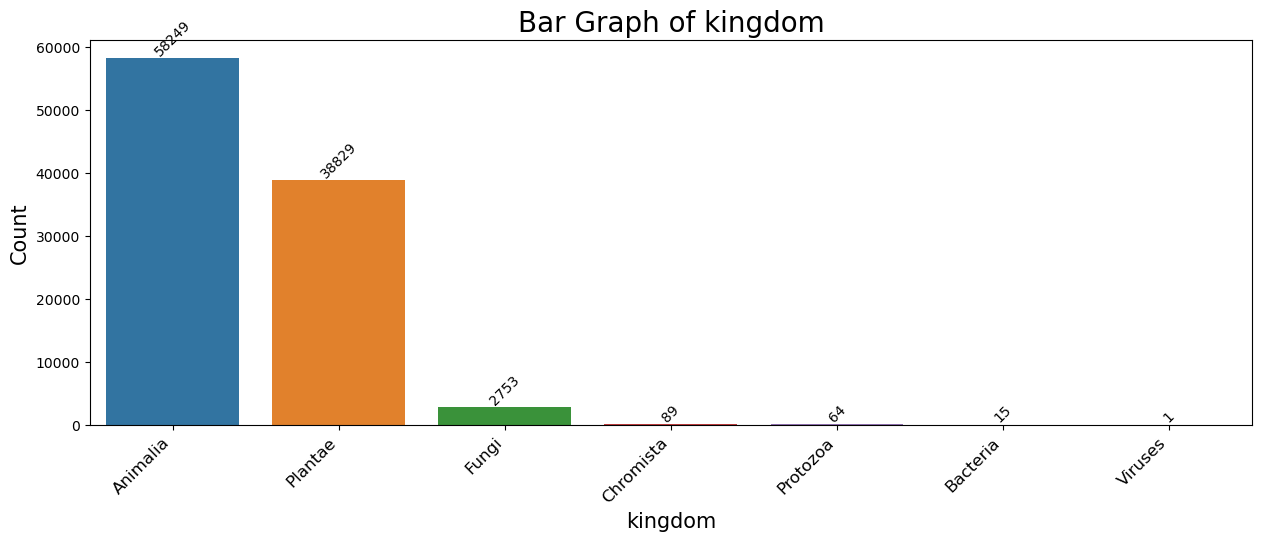

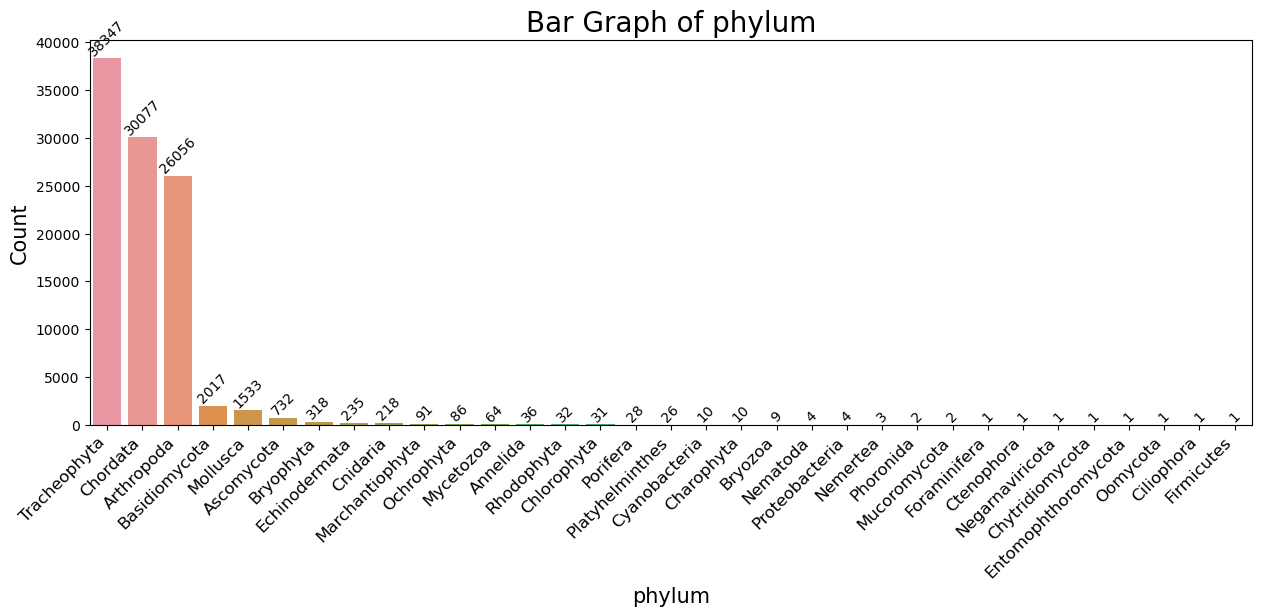

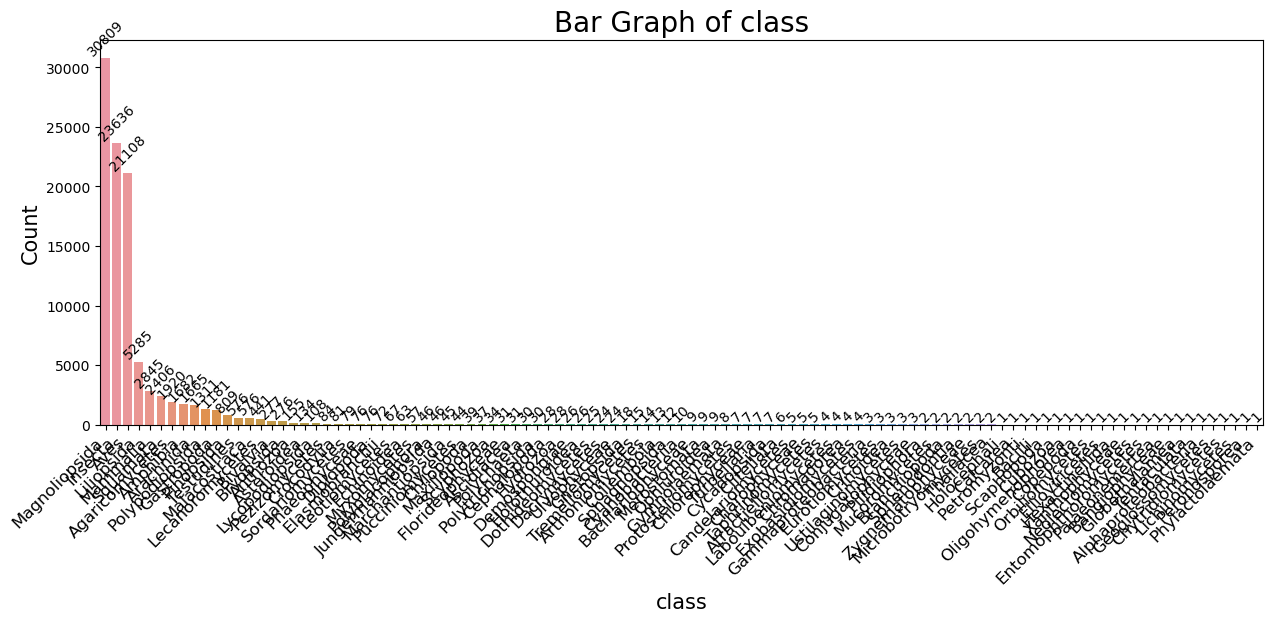

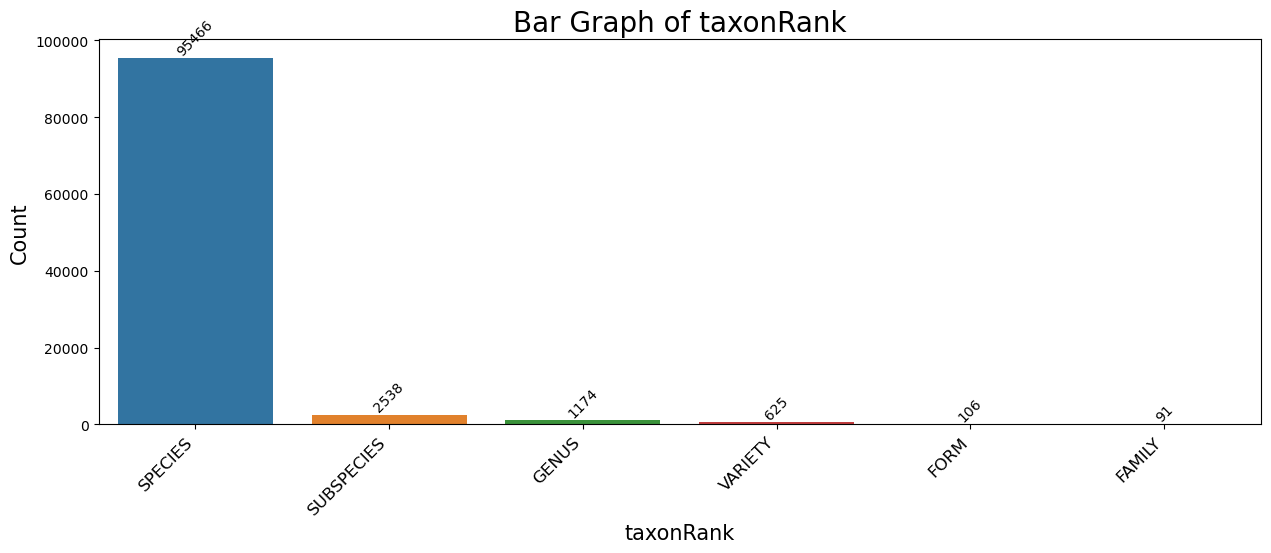

In [19]:
# Let's look at the distribution of our categorical characteristics with a bar graph

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['kingdom','phylum', 'class',  'taxonRank']

plot_bar_graphs(data_cleaned, cat_features)

**Plot 1 Bar plot of Kingdoms :**

This bar graph represents the distribution of records by biological kingdom. The most represented kingdom is Animalia with 58,249 occurrences, followed by Plantae with 38,829 occurrences. Other kingdoms such as Fungi (2,753), Chromista (89), Protozoa (64), Bacteria (15), and Viruses (1) have much fewer occurrences, indicating a large imbalance in the dataset with a strong focus on animal and plant records. The labels on top of each bar highlight the exact count of occurrences for each kingdom.


**Plot 2 Bar plot of Phylum :**

This bar graph displays the distribution of records across various biological phyla. Tracheophyta is the most represented phylum with 38,347 occurrences, followed by Chordata (30,071), Arthropoda (26,656), and Basidiomycota (20,717). Other phyla such as Mollusca (1533), Ascomycota (732), and many others have significantly lower counts. The graph highlights the dominance of plant (Tracheophyta) and animal (Chordata, Arthropoda) phyla, with a long tail of less represented phyla. Each bar is labeled with the corresponding count for easy reference.


**Plot 3 Bar plot of Class :**

The image is a bar graph titled "Bar Graph of class" that shows the count of occurrences for various classes. The x-axis represents different class names, which are displayed in a slanted, overlapping manner due to their large number, making them hard to read. The y-axis represents the count of occurrences, and the bars are color-coded, with larger counts represented by taller bars.

Key observations:
A few classes have very high counts, notably the first class on the x-axis, "Magnoliopsida" (30,009), followed by "Insecta" (25,636), "Agaricomycetes" (21,108), and "Polypodiopsida" (5,285).
After these major classes, the counts drop significantly.
The rest of the classes have much lower counts, and their labels are quite condensed and difficult to distinguish due to the large number of categories displayed.
The color gradient from red to orange may indicate the varying frequencies of the classes.


**Plot 4 Bar plot of Taxon Rank :**

This barplot displays the distribution frequncy distributions of taxon rank for species, subspecies, genus, variety, form and family.

#### <font color='orange'> <b> 3. Percentage Distribution  of our categorical characteristics with a bar graph </b><font color='orange'>



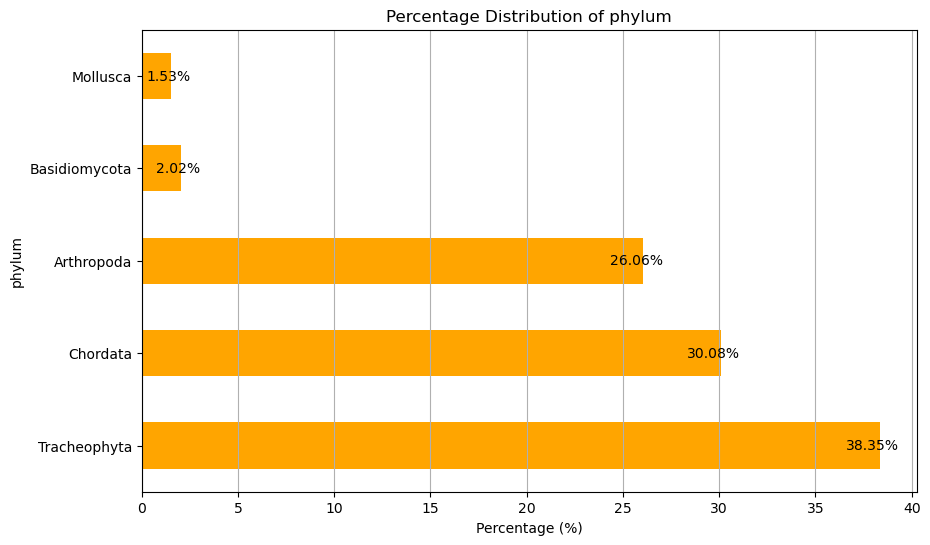

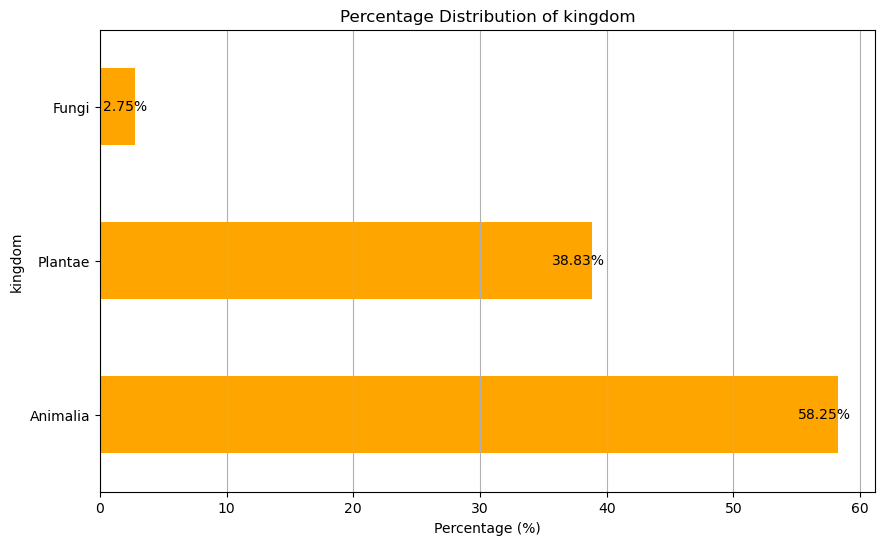

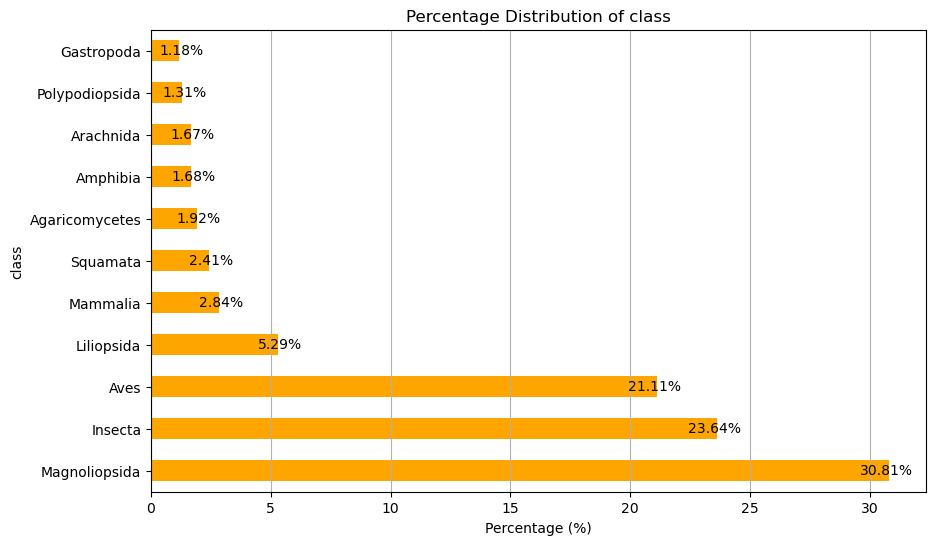

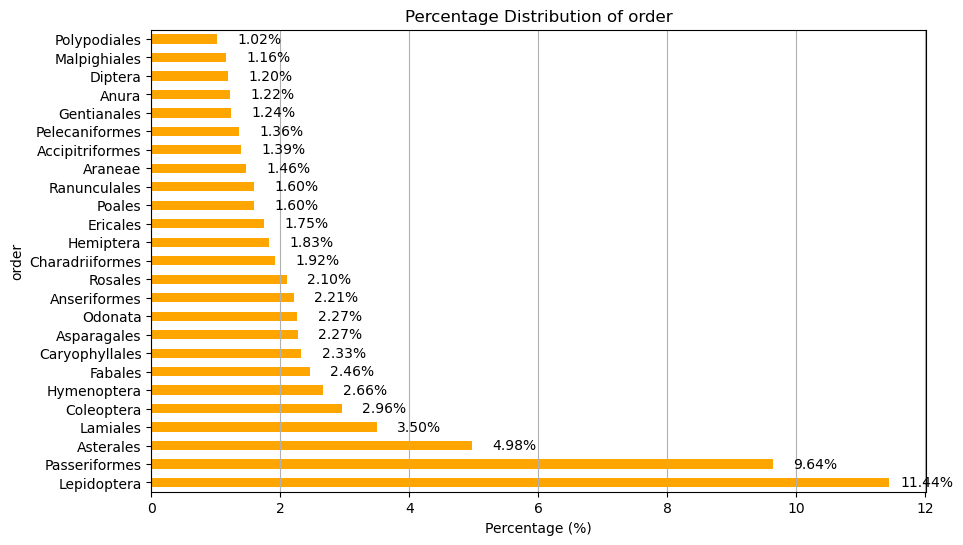

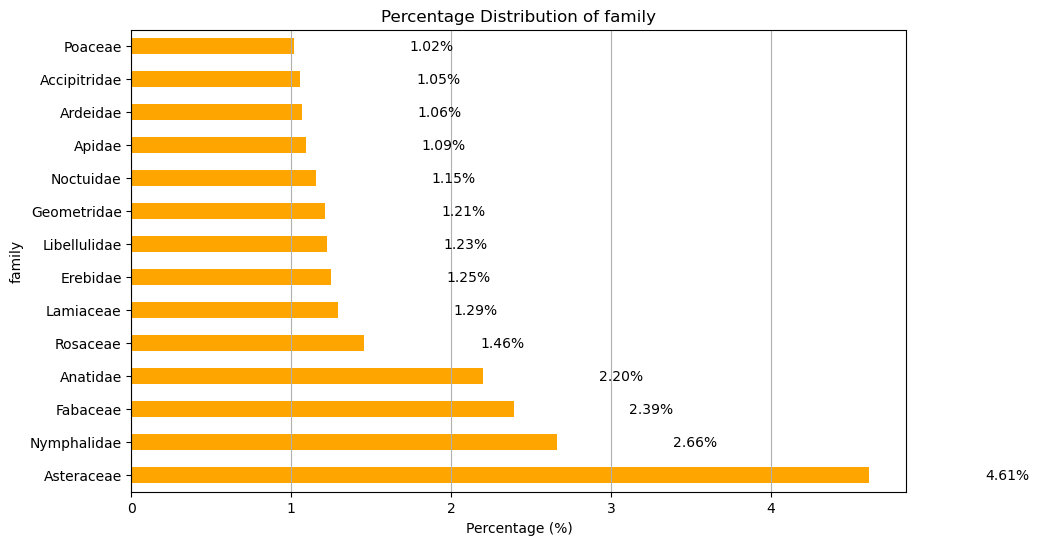

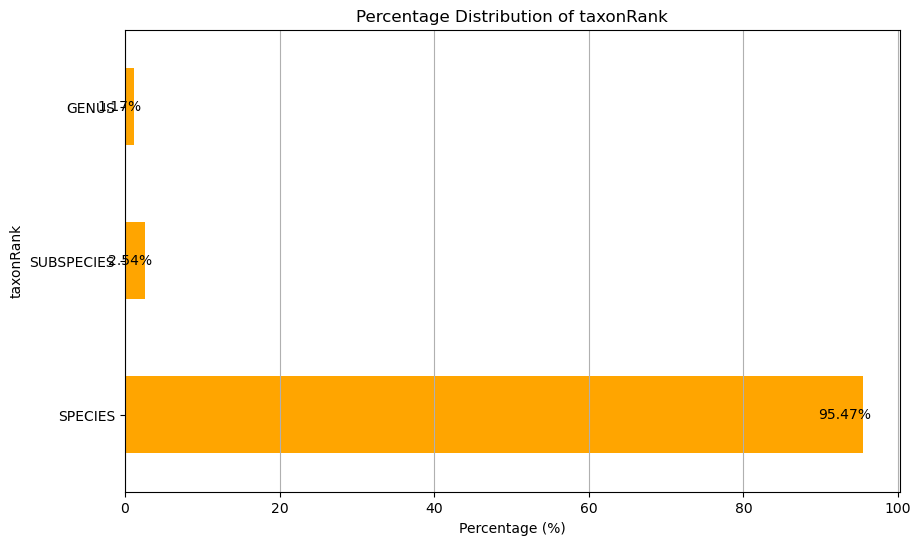

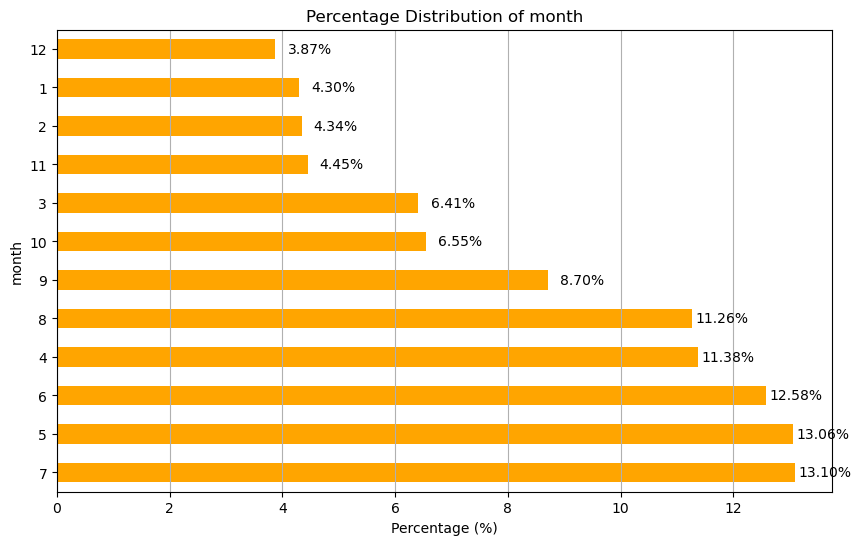

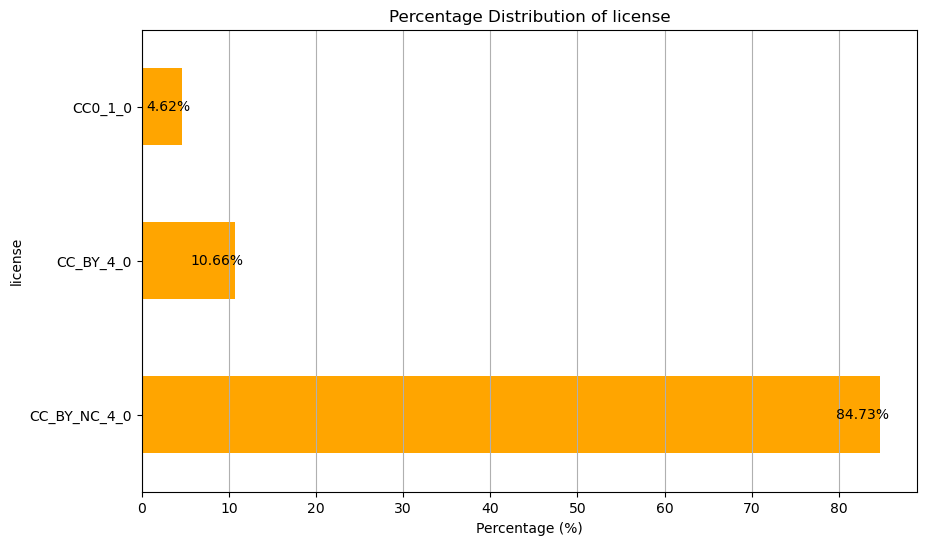

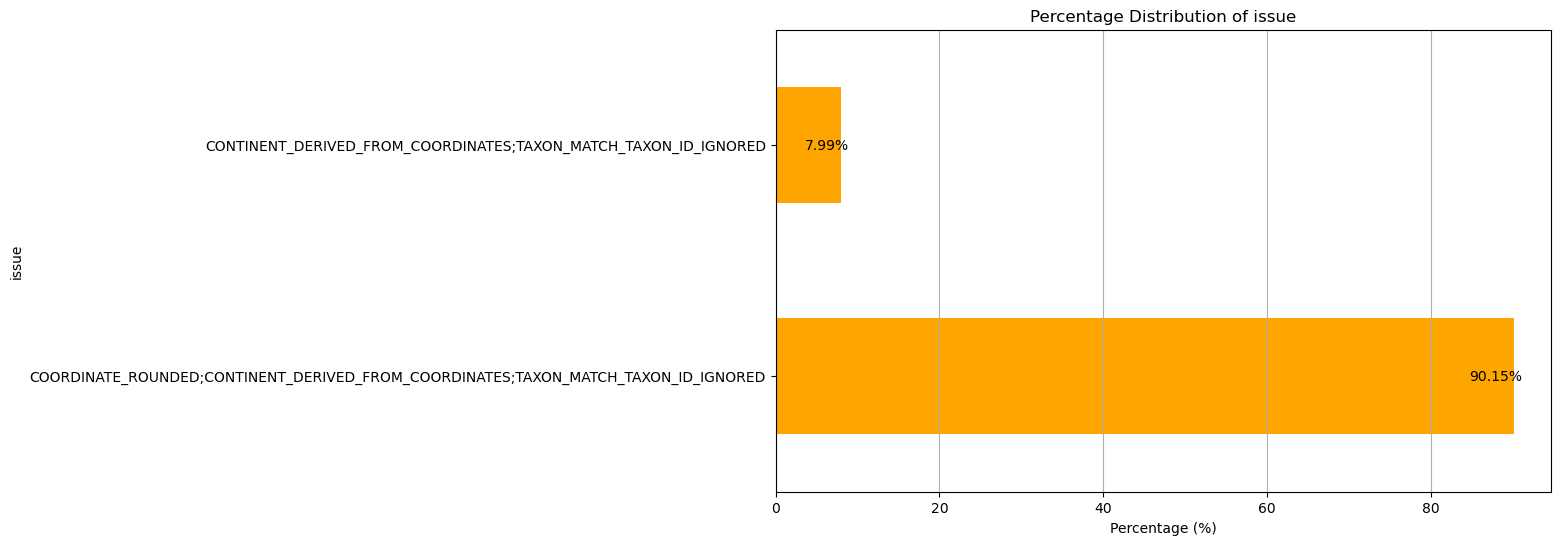

In [48]:
bar_plot_cat=['phylum','kingdom','class','order','family','taxonRank','month','license','issue']

for category in bar_plot_cat:
    # Count occurrences of each phylum
    counts = data_cleaned[category].value_counts()

    # Calculate percentage
    percentage = (counts / len(data_cleaned)) * 100
    
    # Filter classes with more than 1%
    percentage_filtered = percentage[percentage > 1]
    
    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    percentage_filtered.plot(kind='barh', color='orange')  # Set color to orange
    plt.title(f'Percentage Distribution of {category}')
    plt.xlabel('Percentage (%)')
    plt.ylabel(category)
    plt.grid(axis='x')
    for i, (location, percentage) in enumerate(zip(percentage_filtered.index, percentage_filtered.values)):
        plt.text(percentage + 1, i, f'{percentage:.2f}%', ha='right', va='center')
    # Show the plot
    plt.show()
    

#### **Observations from above plots :**

**Plot 1 - Percentage distribution of phylum :** 

This graph displays Percentage of various types of phylums which are observed most of the times. The maximum value is observed for 'Tacheophyta' which is 38.35%.

**Plot 2 - Percentage distribution of kindoms :** 

This graph displays percentage distribution of types of kingdom observed in the dataset. From all types, graph shows 3 most observed types of kingdom.

**Plot 3 - Percentage distribution of Class :**

This graph displays percentage distribution of types of Class observed in the dataset. From all types, graph shows 11 most observed types of class. In which 'Mangnoliopsida', 'Insecta' and 'Aves' have significantly higher percetage than all other classes.

**Plot 4 - Percentage distribuion of order :**

This graph displays percentage distribution of types of order observed in the dataset. From all types, graph shows 25 most observed types of class. In which 'Lepidoptera' and 'Passeriformes' have significantly higher percetage than all other classes.

**Plot 5 - Percentage distribution of family :**

This plot displays percentage distribution of types of family observed in the dataset. From all types, graph shows 14 most observed types of class. In which 'Asteraceae' have significantly higher percetage than all other classes.

**Plot 6 - Percentage distribution of Taxon rank :**

This plot displays percentage distribution Taxon ranks observed in the dataset. From all types, graph shows 3 most observed types of class. In which 'SPECIES' have very higher percetage than all other classes.

**Plot 7 - Percentage distribution of months :**

This plot displays percentage distribution of observations taken in different months.

**Plot 8 - Percentage distribution of license :**

This plot displays percentage distribution of observations taken under 3 types of lisense.

**Plot 9 - Percentage distribution of issue :**

This plot displays percentage distribution of issues during data observations. This shows 2 types of issues which are most observed.


<a id='Numerical-features'></a>
###  <font color=#2865c8> <b>Numerical Features</b><font color='orange'>


<a id='dist-categorical'></a>
###  <font color='orange'> <b> Distribution of Numerical Features</b><font color='orange'>

#### <font color='orange'> <b> 1.  Distribution  of individual Numerical data </b><font color='orange'>


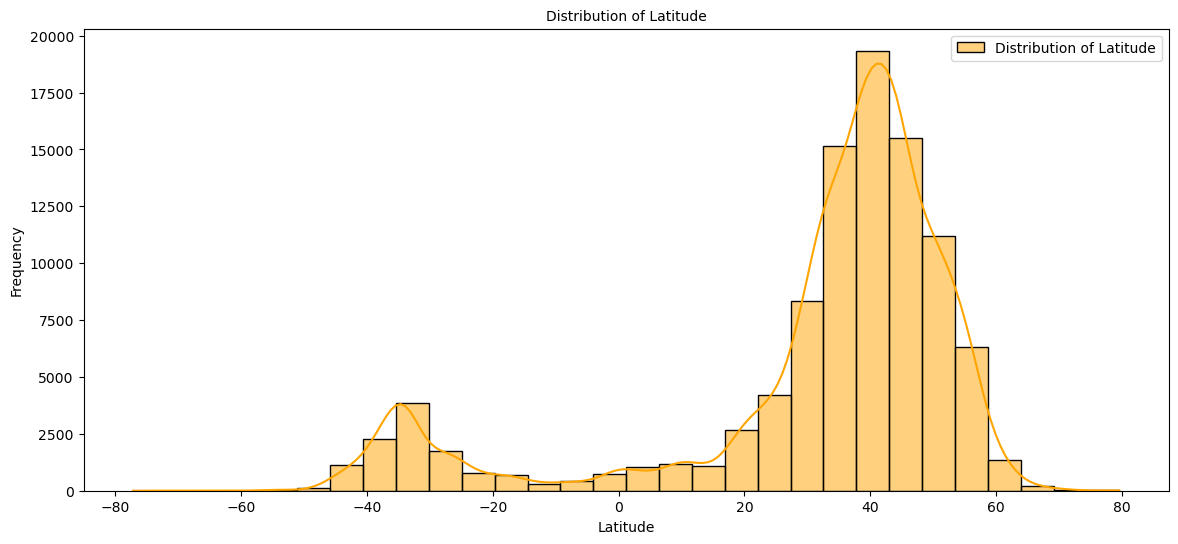

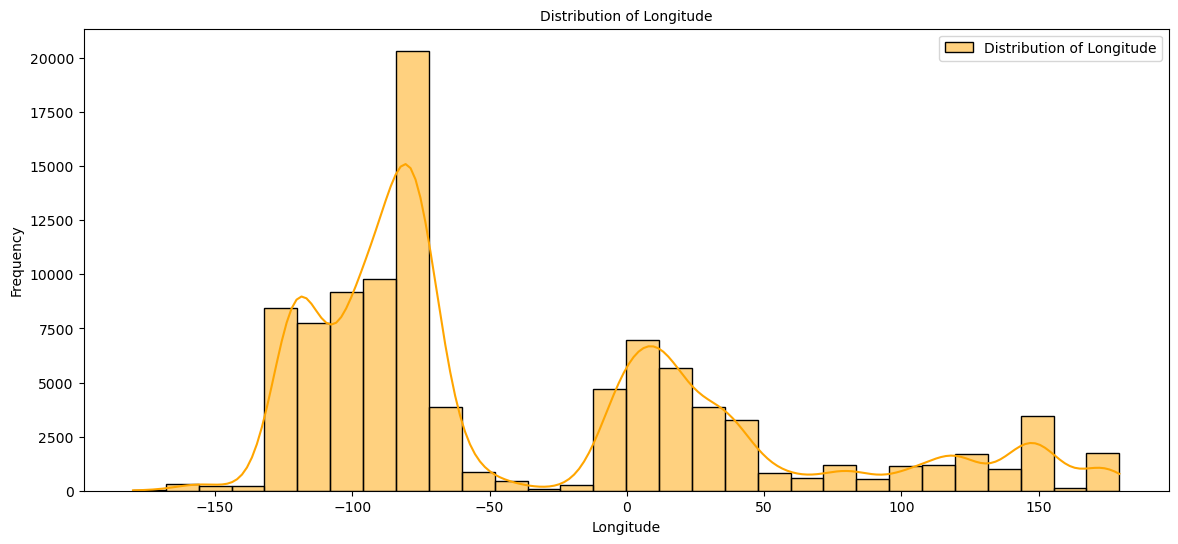

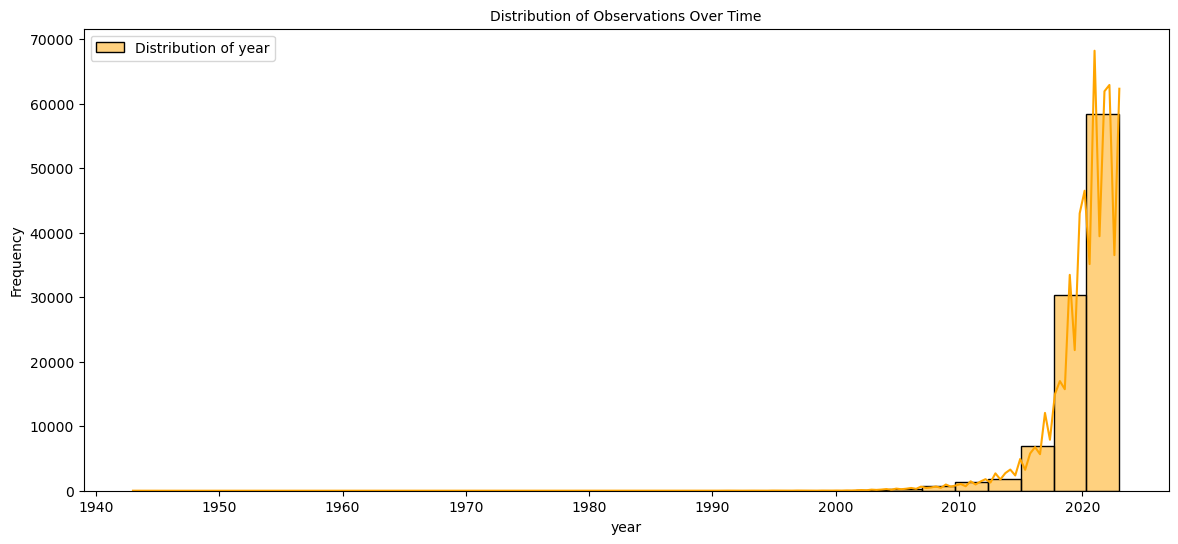

In [50]:
# Distribution of latitude and longitude
plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='decimalLatitude', kde=True, bins=30,label = "Distribution of Latitude",color = "orange")
plt.title('Distribution of Latitude',fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()



plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='decimalLongitude', kde=True, bins=30,label = "Distribution of Longitude",color = "orange")
plt.title('Distribution of Longitude',fontsize=10)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))

sns.histplot(data=data_cleaned, x='year', kde=True,bins=30,label = "Distribution of year",color = "orange")
plt.title('Distribution of Observations Over Time',fontsize=10)
plt.xlabel('year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()


**Plot 1 Distribution of latitudes :**

This plot displays frequency distributions at different lattitudes across the globe. We observe largest obsrvations taken at latitudes near 40 deg. 


**Plot 2 Distribution od longitudes :**

This plot displays frequency distributions at different longitudes across the globe. We observe largest obsrvations taken at longitudes near -100 deg.


**Plot 3 Distribution of Observations per year :**

This plot displays frequenvy distributions of observations taken in different years. Observe that most of the observations taken in the recent years near 2020.

#### <font color='orange'> <b> 2.  Scatter plot of Numerical data </b><font color='orange'>


In [1]:
# Scatter Plot of Latitude and Longitude (Geographical Visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='decimalLongitude', y='decimalLatitude', data=data_cleaned, alpha=0.3,color = "green")
plt.title('Geographical Distribution of Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Relationship Between Year and Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='decimalLatitude', data=data_cleaned,color = "orange")
plt.title('Latitude of Observations Over Time')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.show()


# Relationship Between Year and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='decimalLongitude', data=data_cleaned,color = "orange")
plt.title('decimalLongitude of Observations Over Time')
plt.xlabel('Year')
plt.ylabel('Longitude')
plt.show()

NameError: name 'plt' is not defined

**Plot 1 - Geographical distribution of observations :**

This scatter plot shows the distribution of observations taken at various latitude and longitudes across the world. The darker the color more is the number of observations taken at that location in the world.
We observe some empty spots also on some places, where obervations are expected but no records found at that latitide and longitude.



**Plot 2 - Latitude of observations over time :**

This graph represent the time period at each observation has been taken in form of latitudes.



**Plot 3 - Longitude of Obervations over time :**

This graph represent the time period at each observation has been taken in form of longitudes.

#### <font color='orange'> <b> 3.  Clustering  of Numerical data </b><font color='orange'>


In [ ]:
# --- Clustering ---

# Preprocessing: Standardize latitude and longitude for clustering
geo_data = data_cleaned[['decimalLatitude', 'decimalLongitude']].dropna()
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(geo_scaled)

# Add clusters back to the original data
geo_data['cluster'] = clusters

# 10. Visualize Clusters on Geographical Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=geo_data['decimalLongitude'], y=geo_data['decimalLatitude'], hue=geo_data['cluster'], palette='viridis')
plt.title('Geographical Clustering of Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

It will display a scatter plot showing the geographical clustering of observations, where different colors represent different clusters. This visualization can help you understand spatial patterns in your data.

**Clustering:** 
The geographical scatter plot of latitude and longitude shows that observations cluster around certain regions. These clusters represent biodiversity hotspots where more observations were recorded.
KMeans Clustering reveals 5 distinct geographical clusters. These could represent different ecological zones, areas with higher scientific activity, or regional biodiversity.


<a id='correlation-numerical'></a>
###  <font color='orange'> <b> Correlations of Numerical Features</b><font color='orange'>


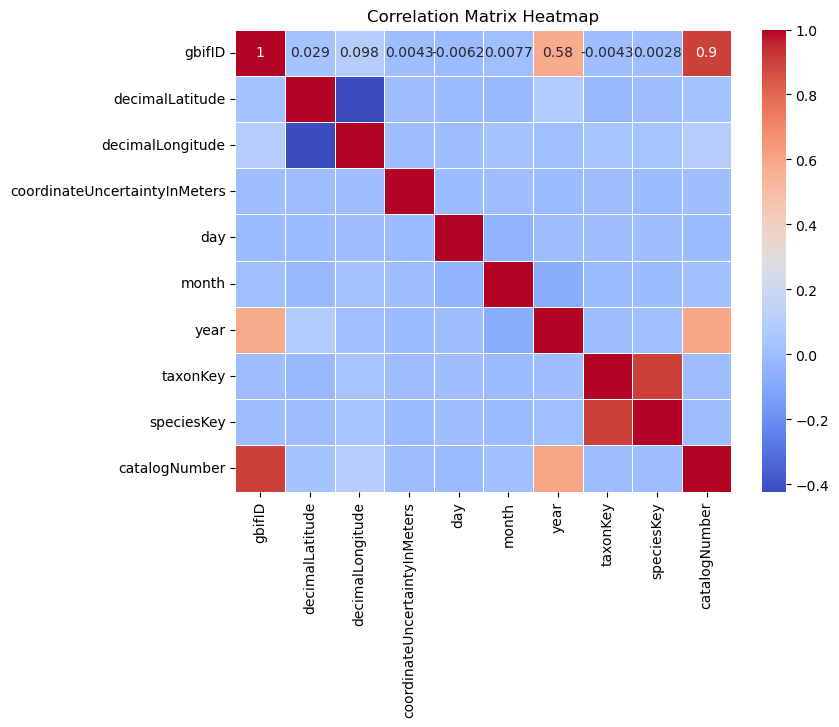

In [54]:
correlation_matrix = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix shows weak multicollinearity among several features. Specifically:

- `taxonKey`, `speciesKey`,  have very high correlations .
- `CatlogNumber` and `gbifID`  and `year` are also highly correlated with each other.
- `decimalLatitude` has strong Negative correlations with `decimalLongitude`

These findings suggest that no need to remove non correlated feature.Removing some highly correlated features can help reduce multicollinearity and improve model performance.


<a id='Pairplot-numerical'></a>
###  <font color='orange'> <b> Pairplot of Numerical Features</b><font color='orange'>



In [ ]:
# Pairplot for the dataframe

sns.pairplot(data_cleaned,
             kind="reg",
             diag_kind="kde", 
             plot_kws={"line_kws": {"color": "red"}}
            )

The pairplot shows the relationships and distributions between various numerical features in the dataset. Here's a brief analysis:

<a id='outlier-analysis'></a>
## <font color=#2865c8> <b> Outlier Analysis </b><font color='orange'>


In [ ]:
# Checking Outliers

# Initialize the subplot counter
x = 0

# Create a figure with specified size
plt.figure(figsize=(16, 4))
select_column=['decimalLatitude','decimalLongitude','coordinateUncertaintyInMeters','year','taxonKey','speciesKey','catalogNumber']
# Loop through each numerical column and create a boxplot
for col in select_column:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=data_cleaned[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

* We do not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.

<a id='Skewness-analysis'></a>
## <font color=#2865c8> <b> Skewness Analysis </b><font color='orange'>



In [53]:
# Calculate skewness for numeric features


num_cols= data_cleaned.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = data_cleaned[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
coordinateUncertaintyInMeters,69.743494
speciesKey,1.120680
taxonKey,1.049268
decimalLongitude,0.992200
gbifID,-0.774334
decimalLatitude,-1.725566
year,-4.008949


**Observation:**
- A skewness value greater than 1 indicates positive skewness,
- a skewness value less than -1 indicates negative skewness,
- and a skewness value close to zero indicates a relatively symmetric distribution.

#

### What patterns and trends emerge :

**Geographical Patterns :**

Clustering: The geographical scatter plot of latitude and longitude shows that observations cluster around certain regions. These clusters represent biodiversity hotspots where more observations were recorded.
KMeans Clustering reveals 5 distinct geographical clusters. These could represent different ecological zones, areas with higher scientific activity, or regional biodiversity.

**Temporal Patterns :**
Increasing Observations: The histogram of observation counts over time shows a sharp increase in data collection from around 2019 onwards, likely due to heightened biodiversity recording efforts in recent years.

**Latitudinal Trends :**
A slight upward trend in latitudes over time, suggesting that either species are being observed more frequently in northern regions, or there has been a shift in the focus of observations towards northern areas.




#

### **CONCLUSION :**
**We have key takeaways or insights after observing all the results, visualizations and clustering :**

Rich Biodiversity Data: The dataset contains diverse information on species from various taxonomic ranks and locations, making it a valuable resource for studying biodiversity.

Spatial Clustering: Biodiversity observations are geographically clustered, indicating that more attention is paid to certain regions. This could be due to ecological factors or more active research in those areas.

Temporal Trends: The dataset is skewed toward recent years (post-2019), which may reflect increased attention toward biodiversity tracking and conservation.
Missing and Incomplete Data: Key environmental variables like elevation and depth are almost entirely missing, limiting the analysis of how environmental factors impact species diversity. Similarly, the imprecise location coordinates in some records can impact geographical analysis.

**Data Tells us :**

The data reflects both a concentrated effort in recent years to observe and document biodiversity, 
as well as gaps in observation data that may suggest under-reporting or difficulty in accessing certain regions. 
It reveals patterns of species richness in certain geographic regions but is limited by missing environmental information. 
In summary, the data showcases both the strengths and the limitations of biodiversity observation efforts across the globe.